In [1]:
from pulser import Pulse, Sequence, Register
from pulser.devices import Chadoq2

import matplotlib.pyplot as plt
import numpy as np

In [2]:
from simulation import Simulation
import timeit

simulation module...


In [3]:
from pulser.waveforms import RampWaveform, GaussianWaveform

def qubits_benchmark(N):
    number_atoms = N
    reg = Register.rectangle(1, number_atoms, spacing=4.9,prefix='q')
    device = Chadoq2(reg) 
    #reg.draw()

    #Define sequence and Set channels
    seq = Sequence(device)
    seq.declare_channel('local', 'raman_local')
    seq.declare_channel('global', 'rydberg_global')

    duration = 300
    amp_wf = GaussianWaveform(duration, 1, 150)   # Duration: 300 ns, Max Amp: 1 MHz, Stdev: 150 ns
    detuning_wf = RampWaveform(duration, -20, 20)  # Duration: 300ns, linear sweep from -20 to 20 MHz

    complex_pulse = Pulse(amp_wf, detuning_wf, phase=20)
    #complex_pulse.draw()

    seq.target('q1','local')
    seq.add(complex_pulse, 'local')
    seq.add(complex_pulse, 'global')
    #seq.draw()
    
    simul = Simulation(seq)
    
    #Create desired observable
    ryd_Z = simul._operators['rydZ']
    for qubit in reg.qubits:
        observable = simul.build_local_operator(ryd_Z,qubit)
    
    #Run simulation experiment
    simul.run(observable,plot=False)
    
def sequence_benchmark(N):
    number_atoms = 2
    reg = Register.rectangle(1, number_atoms, spacing=4.9,prefix='q')
    device = Chadoq2(reg) 
    #reg.draw()

    #Define sequence and Set channels
    seq = Sequence(device)
    seq.declare_channel('local', 'raman_local')
    seq.declare_channel('global', 'rydberg_global')

    duration = 200
    amp_wf = GaussianWaveform(duration, 1, 150)   
    detuning_wf = RampWaveform(duration, -20, 20)  

    complex_pulse = Pulse(amp_wf, detuning_wf, phase=20)
    #complex_pulse.draw()

    seq.target('q1','local')
    for _ in range(N):
        seq.add(complex_pulse, 'local')
        seq.add(complex_pulse, 'global')
        #seq.draw()    
        
    simul = Simulation(seq)

    #Create desired observable
    ryd_Z = simul._operators['rydZ']
    for qubit in reg.qubits:
        observable = simul.build_local_operator(ryd_Z,qubit)
    

    #Run simulation experiment
    simul.run(observable,plot=False)

# Simulation time for increasing number of atoms

In [12]:
#results = []

for k in range(7,8):
    print(f'Number of qubits: {k}')
    times = %timeit -o qubits_benchmark(k)
    results.append(times)

Number of qubits: 7
1min 30s ± 8.25 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


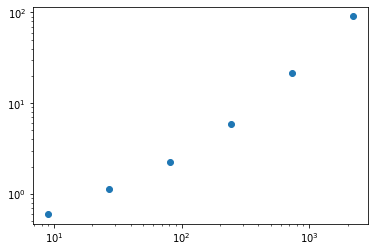

In [133]:
mean_times = [r.average for r in results]
plt.loglog(3**np.arange(2,8),mean_times,'o')
plt.loglog(3**np.linspace(1,7,30),0.001*np.exp(2*(np.linspace(1,7,30))),'grey',lw=5,alpha=0.3)

In [20]:
3**np.arange(2,8)

array([   9,   27,   81,  243,  729, 2187])

# Simulation time for increasing depth of sequence

In [ ]:
depth_results = []

for k in range(1,5):
    print(f'Number of pulses = {2*k}')
    times = %timeit -o sequence_benchmark(k)
    depth_results.append(times)

In [ ]:
depth_times = [r.average for r in depth_results]
plt.plot(np.arange(1,5),depth_times)